- toc: true 
- badges: true
- comments: true
- sticky_rank: 1
- author: josua naiborhu
- title: Play for a chance to win 1 of 10 HP ZBook Studios & a trip to the Kaggle Days x Z by HP World Championship in Barcelona
- categories: [Pytorch, Neural Network, activation function,loss]
- comments: true

## Challenge 4 - (Image Classification)
![pytorch](https://code.kaytouch.biz/wp-content/uploads/2018/05/pytorch-470x250.png)

## The Task 
The challenge is to build a machine learning model to classify images of "La Eterna". This can be done in a variety of ways. For this challenge i implemented CNN using pytorch to classify the images. The data is split into a training and a submission set. The images includes two labeled folders in the Test folder. The folder labeled "la_eterna" includes the pictures of la eterna that Eva captured. The other folder labeled "other_flowers" includes pictures of other flowers that are not la eterna. We will use this data to build our classifier. Each of the images has been formatted to the dimensions (224,224, 3) for the analysis. You can check the episode for each chalenge in this video

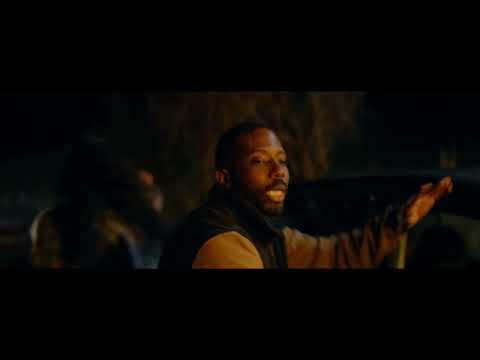

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('iycrQpWIMnQ', width=800, height=500)

## Import libraries

In [3]:
# Library
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models


In [4]:
data_dir = "data_cleaned/Train"
def load_split_train_test(datadir, valid_size = .2):
    train_transforms = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    test_transforms = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    train_data = datasets.ImageFolder(datadir,       
                    transform=train_transforms)
    test_data = datasets.ImageFolder(datadir,
                    transform=test_transforms)
    num_train = len(train_data)
    indices = list(range(num_train))
    split = int(np.floor(valid_size * num_train))
    np.random.shuffle(indices)
    from torch.utils.data.sampler import SubsetRandomSampler
    train_idx, test_idx = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)
    trainloader = torch.utils.data.DataLoader(train_data,
                   sampler=train_sampler, batch_size=64)
    testloader = torch.utils.data.DataLoader(test_data,
                   sampler=test_sampler, batch_size=64)
    return trainloader, testloader
trainloader, testloader = load_split_train_test(data_dir, .2)
print(trainloader.dataset.classes)

['la_eterna', 'other_flowers']


In [5]:
def img_display(img):
    img = img    # unnormalize
    npimg = img.numpy()
    npimg = np.transpose(npimg, (1, 2, 0))
    return npimg

## Check trainloader Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

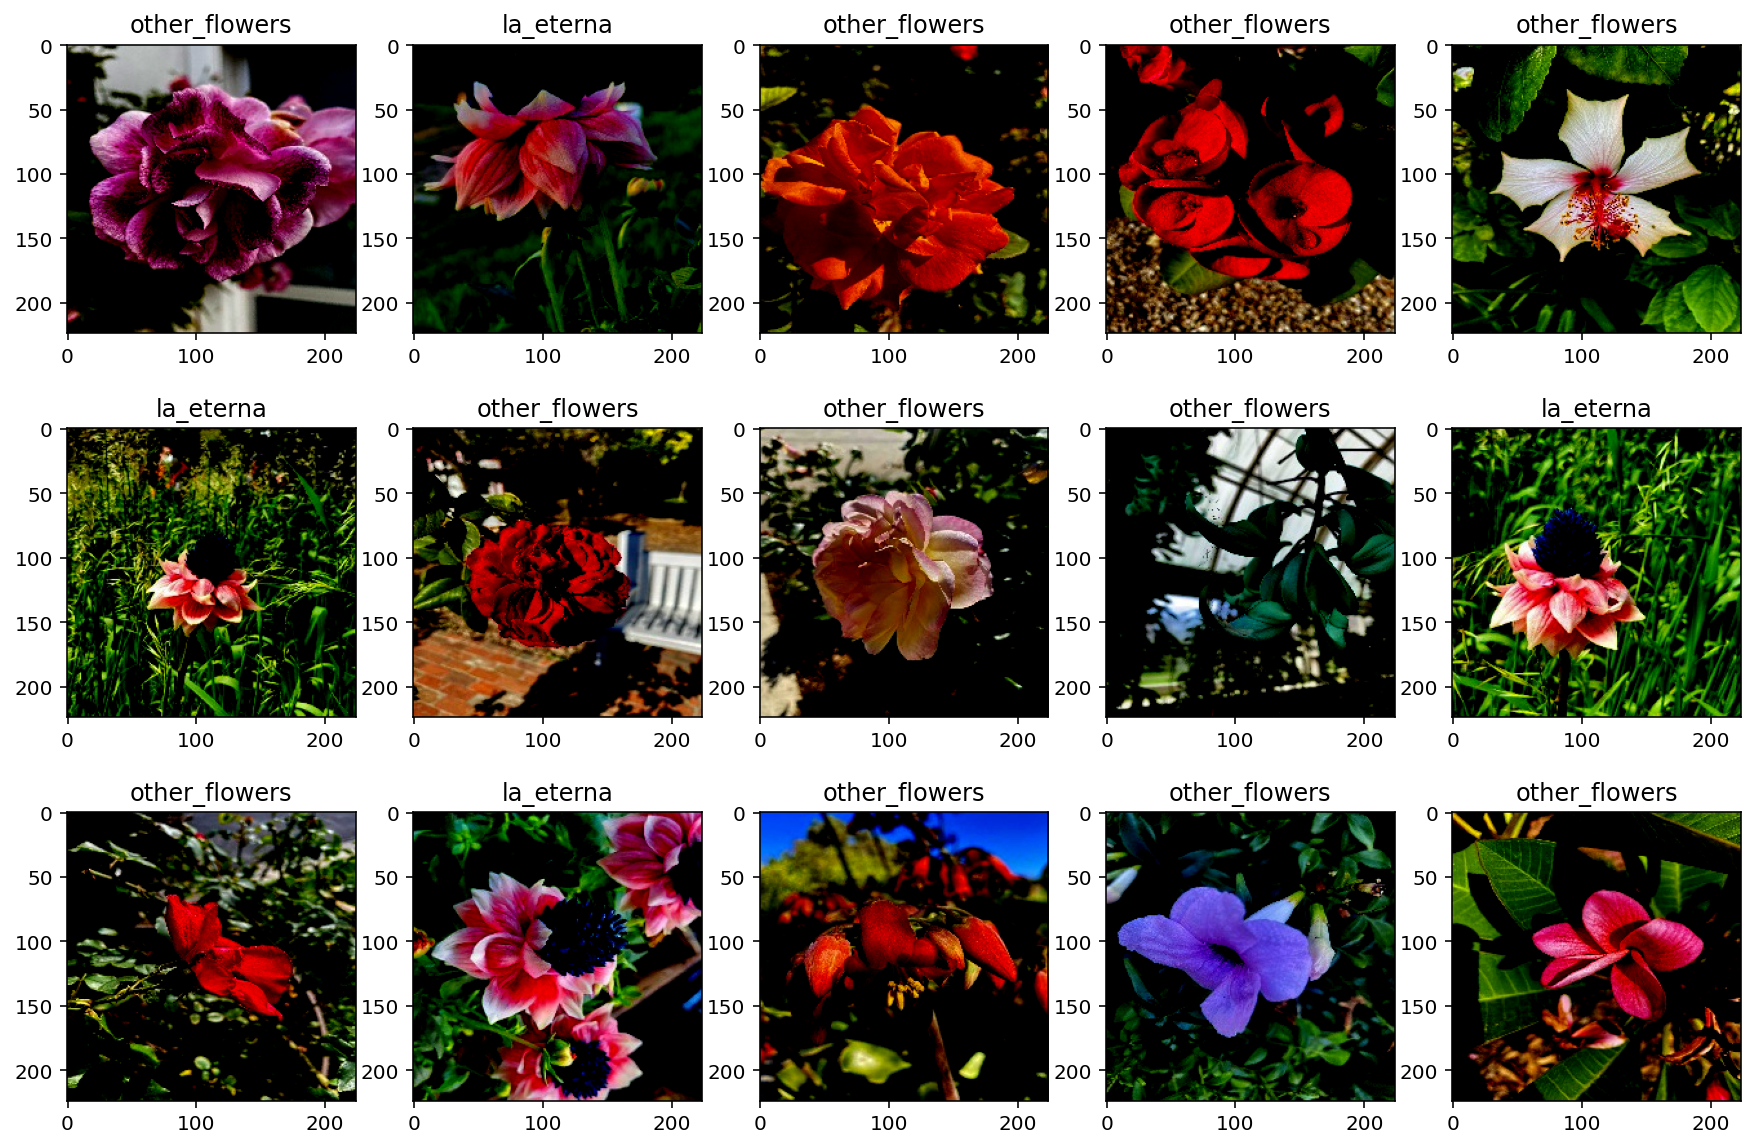

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
arthopod_types = {0: 'la_eterna', 1:  'other_flowers'}
# Viewing data examples used for training
fig, axis = plt.subplots(3, 5, figsize=(15, 10))
for i, ax in enumerate(axis.flat):
    with torch.no_grad():
        image, label = images[i], labels[i]
        ax.imshow(img_display(image)) # add image
        ax.set(title = f"{arthopod_types[label.item()]}") # add label

## Check the images shape in each steps of Neural Network Process to make us easier to form the CNN model

In [7]:
import matplotlib.pyplot as plt
import torchvision
dataiter = iter(trainloader)
images,labels = dataiter.next()
img_display(torchvision.utils.make_grid(images))

conv1 = nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,stride=1,padding=1)
pool = nn.MaxPool2d(2, 2)
conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
print(images.shape)
x = conv1(images)
print(x.shape)
x =pool(x)
print(x.shape)
x =conv2(x)
print(x.shape)
x =conv3(x)
print(x.shape)

torch.Size([64, 3, 224, 224])
torch.Size([64, 12, 224, 224])
torch.Size([64, 12, 112, 112])
torch.Size([64, 20, 112, 112])
torch.Size([64, 32, 112, 112])


## Create Convolutional Neural Network Architecture

In [8]:
#CNN Network
class ConvNet(nn.Module):
    def __init__(self,num_classes=2):
        super(ConvNet,self).__init__()
        
        #Output size after convolution filter
        #((w-f+2P)/s) +1
        
        #Input shape= (64,3,224,224)
        
        self.conv1=nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,stride=1,padding=1)
        #Shape= (64,12,224,224)
        self.bn1=nn.BatchNorm2d(num_features=12)
        #Shape= (64,12,224,224)
        self.relu1=nn.ReLU()
        #Shape= (64,12,224,224)
        
        self.pool=nn.MaxPool2d(kernel_size=2)
        #Shape= (64,12,224,224)
        
        self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
        #Shape= (64,20,112,112)
        self.relu2=nn.ReLU()
        #Shape= (64,20,112,112)
        
        self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
         #Shape= (64,32,112,112)
        self.bn3=nn.BatchNorm2d(num_features=32)
         #Shape= (64,32,112,112)
        self.relu3=nn.ReLU()
         #Shape= (64,32,112,112)
        
        
        self.fc=nn.Linear(in_features=112 * 112* 32,out_features=num_classes)
    
    
        #Feed forwad function
    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
            
        output=self.pool(output)
            
        output=self.conv2(output)
        output=self.relu2(output)
            
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
            
            
        #Above output will be in matrix form, with shape (256,32,112,112)
        output=output.view(-1,32*112*112)
        output=self.fc(output)
            
        return output

In [9]:
model = ConvNet() # On CPU
print(model)

ConvNet(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc): Linear(in_features=401408, out_features=2, bias=True)
)


## Initialize Loss function

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001,weight_decay=0.0001)

In [11]:
def accuracy(out, labels):
    _,pred = torch.max(out, dim=1)
    return torch.sum(pred==labels).item()


## Training Process through Convolutional Neural Network

In [12]:
n_epochs = 12
print_every = 10
valid_loss_min = np.Inf
val_loss = []
val_acc = []
train_loss = []
train_acc = []
total_step = len(trainloader)
for epoch in range(1, n_epochs+1):
    running_loss = 0.0
    # scheduler.step(epoch)
    correct = 0
    total=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (data_, target_) in enumerate(trainloader):
        #data_, target_ = data_.to(device), target_.to(device)# on GPU
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(data_)
        loss = criterion(outputs, target_)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        _,pred = torch.max(outputs, dim=1)
        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
    train_acc.append(100 * correct / total)
    train_loss.append(running_loss/total_step)
    print(f'\ntrain loss: {np.mean(train_loss):.4f}, train acc: {(100 * correct / total):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
    with torch.no_grad():
        model.eval()
        for data_t, target_t in (testloader):
            #data_t, target_t = data_t.to(device), target_t.to(device)# on GPU
            outputs_t = model(data_t)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            total_t += target_t.size(0)
        val_acc.append(100 * correct_t / total_t)
        val_loss.append(batch_loss/len(testloader))
        network_learned = batch_loss < valid_loss_min
        print(f'validation loss: {np.mean(val_loss):.4f}, validation acc: {(100 * correct_t / total_t):.4f}\n')
        # Saving the best weight 
        if network_learned:
            valid_loss_min = batch_loss
            torch.save(model.state_dict(), 'model_classification_tutorial.pt')
            print('Detected network improvement, saving current model')
    model.train()

Epoch 1

Epoch [1/12], Step [0/7], Loss: 0.7828

train loss: 4.3233, train acc: 55.4779
validation loss: 0.5667, validation acc: 69.1589

Detected network improvement, saving current model
Epoch 2

Epoch [2/12], Step [0/7], Loss: 2.0096

train loss: 3.6552, train acc: 75.0583
validation loss: 0.7703, validation acc: 42.0561

Epoch 3

Epoch [3/12], Step [0/7], Loss: 1.2640

train loss: 2.7823, train acc: 80.1865
validation loss: 0.7495, validation acc: 76.6355

Epoch 4

Epoch [4/12], Step [0/7], Loss: 0.8584

train loss: 2.2371, train acc: 89.7436
validation loss: 0.8120, validation acc: 60.7477

Epoch 5

Epoch [5/12], Step [0/7], Loss: 1.0303

train loss: 1.8770, train acc: 90.9091
validation loss: 0.7693, validation acc: 86.9159

Epoch 6

Epoch [6/12], Step [0/7], Loss: 0.2469

train loss: 1.5874, train acc: 97.2028
validation loss: 0.7170, validation acc: 89.7196

Detected network improvement, saving current model
Epoch 7

Epoch [7/12], Step [0/7], Loss: 0.0705

train loss: 1.3695, t

### Insights 💡 

> You can see that at epoch 5 we get the best result with accuracy 97.6 on training images and 91.6 on the validation images
and loss is 1.3 on training images and 0.4 on validation images.

## Train - Validation Loss

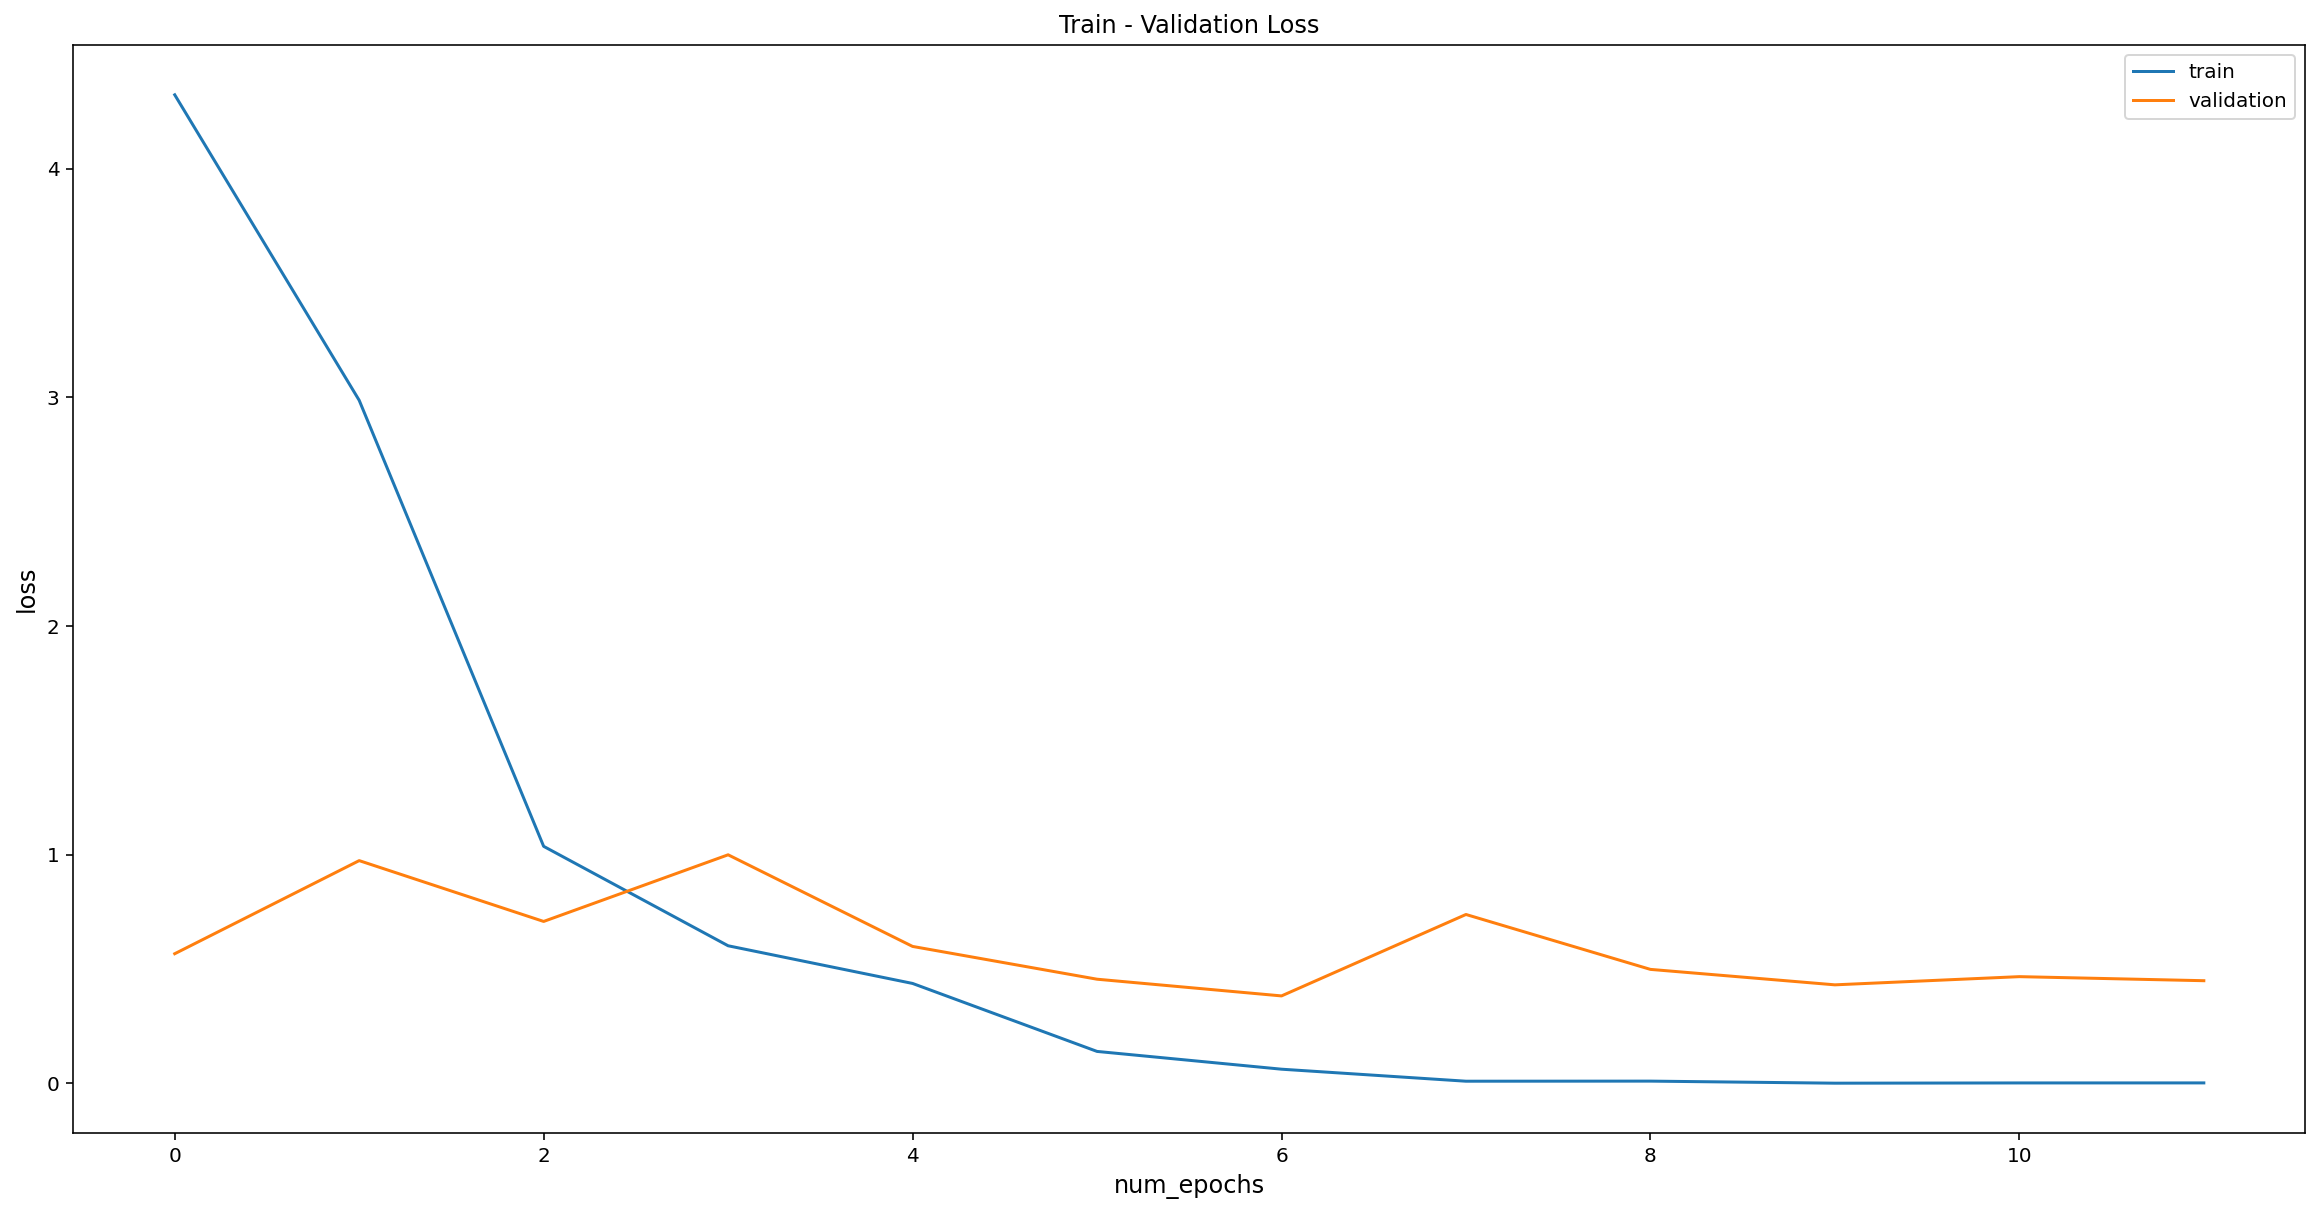

In [14]:
fig = plt.figure(figsize=(20,10))
plt.title("Train - Validation Loss")
plt.plot( train_loss, label='train')
plt.plot( val_loss, label='validation')
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.legend(loc='best')

## Train - Validation Accuracy

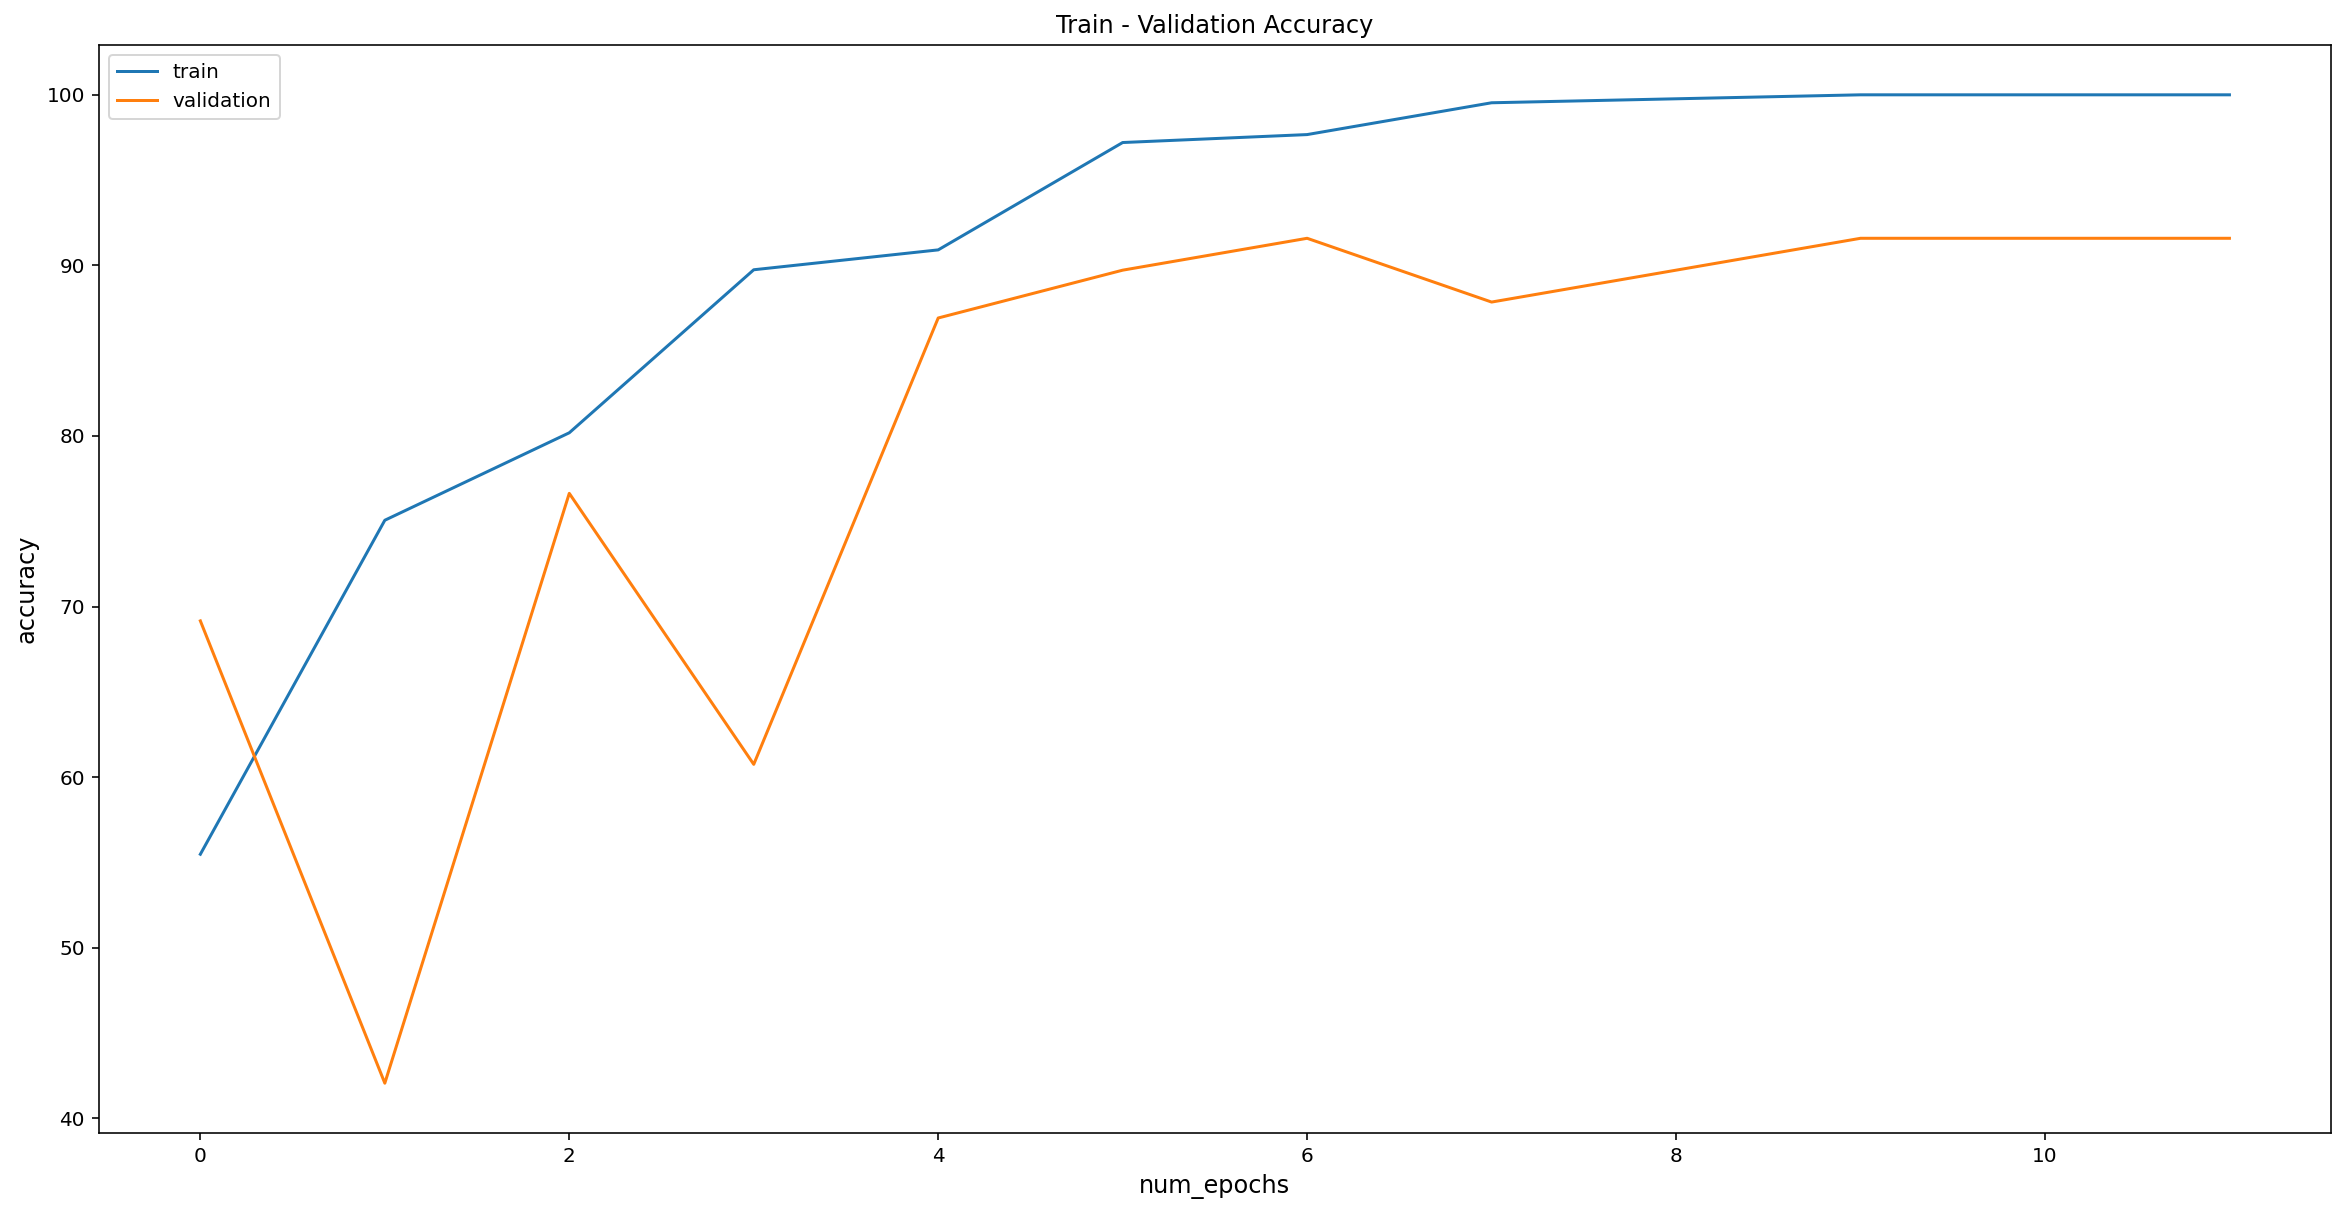

In [15]:
fig = plt.figure(figsize=(20,10))
plt.title("Train - Validation Accuracy")
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='validation')
plt.xlabel('num_epochs', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.legend(loc='best')

In [16]:
# Importing trained Network with better loss of validation
model.load_state_dict(torch.load('model_classification_tutorial.pt'))

<All keys matched successfully>

## Evaluation using submission images

In [17]:
submission_path ="data_cleaned/scraped_images"
submission_transforms = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
submission_data = datasets.ImageFolder(submission_path,transform=submission_transforms)
submissionloader = torch.utils.data.DataLoader(submission_data,shuffle=True, batch_size=64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

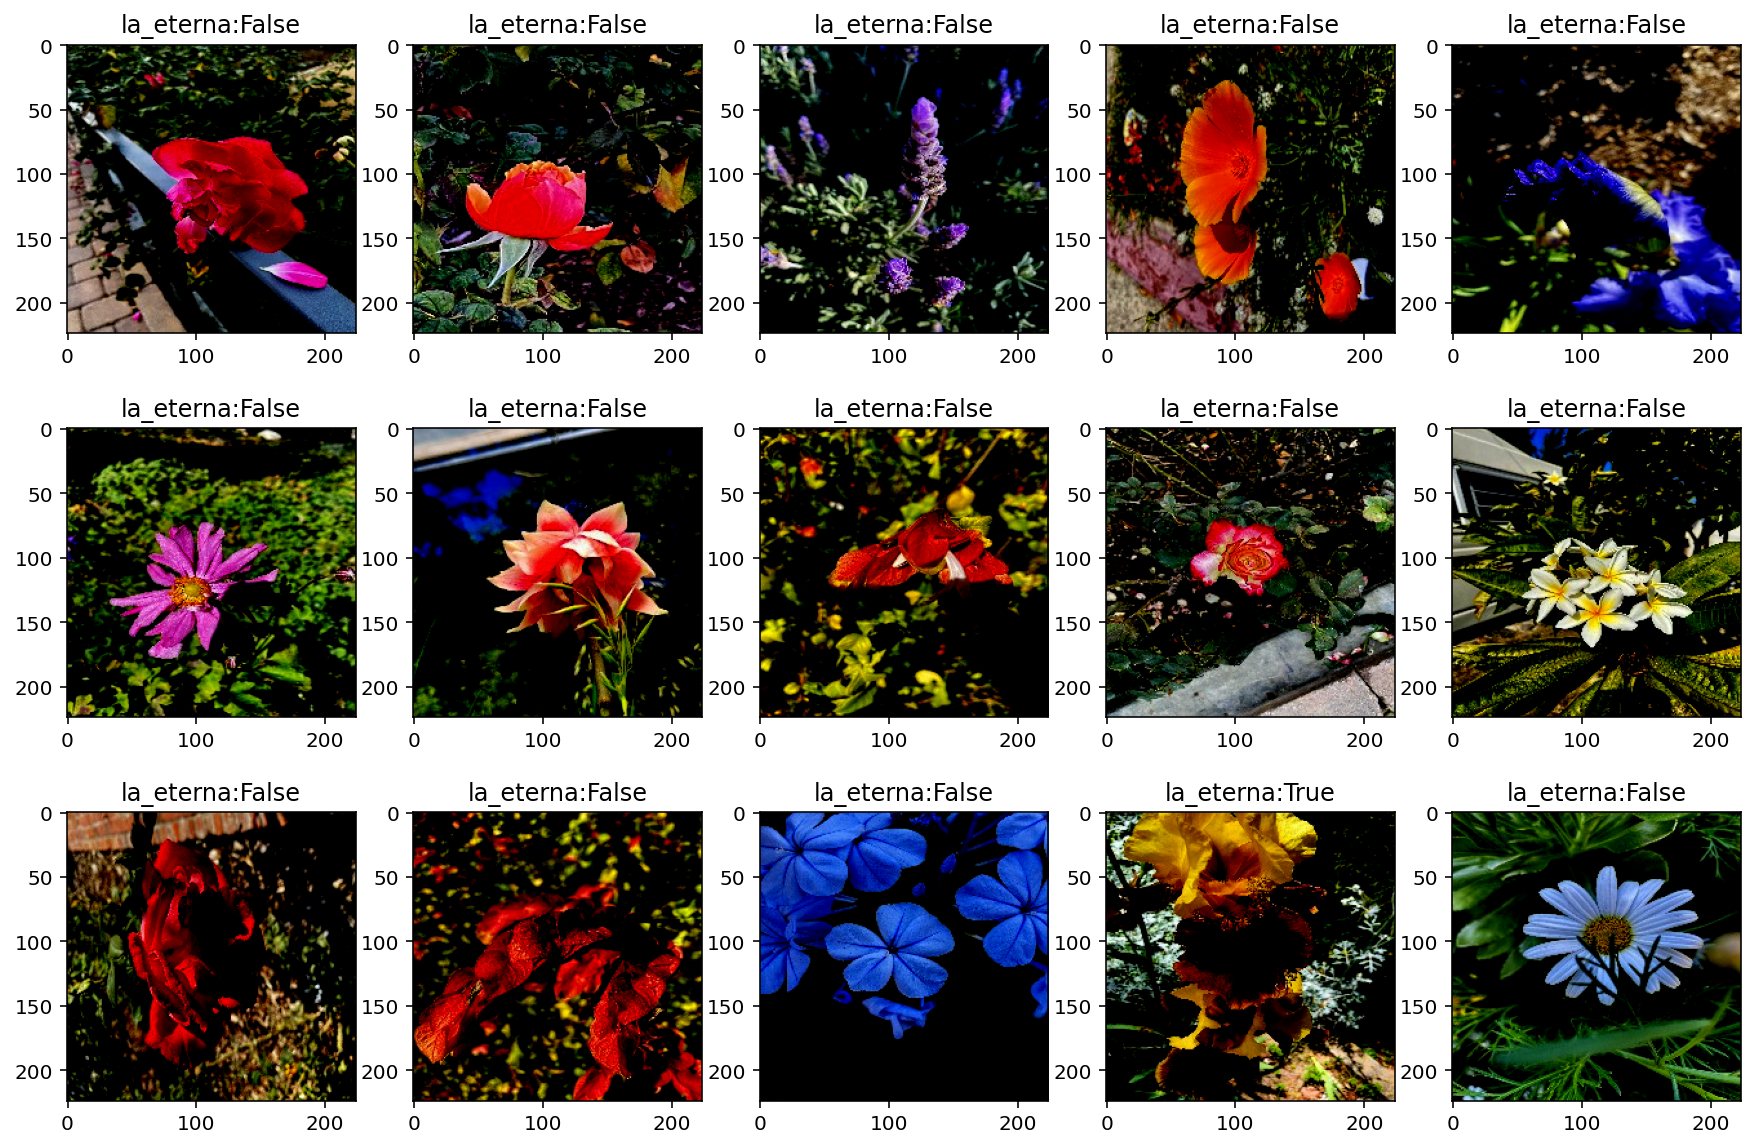

In [20]:
dataiter = iter(submissionloader)
images, labels = dataiter.next()
flower_types = {0:'la_eterna', 1:'other_flowers'}
# Viewing data examples used for training
fig, axis = plt.subplots(3, 5, figsize=(15, 10))
submission =pd.DataFrame(columns = ["labels","preditions"])
with torch.no_grad():
    model.eval()
    for ax, image, label in zip(axis.flat,images, labels):
        ax.imshow(img_display(image)) # add image
        image_tensor = image.unsqueeze_(0)
        output_ = model(image_tensor)
        output_ = output_.argmax()
        k = output_.item()==label.item()
        ax.set_title(str(flower_types[label.item()])+":" +str(k)) # add label
        

### Insights 💡 

> You can see that based on the images given, the model can clasify whether it is la eterna or other flower.